Chapter 13

# 矩阵映射
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用一个对称矩阵 
$$A = \begin{bmatrix} 1.25 & -0.75 \\ -0.75 & 1.25 \end{bmatrix}$$
对二维平面上的向量场进行变换，逐步展示矩阵如何改变几何形状。代码的主要步骤和几何效果如下：

1. **生成原始向量场**：在 $[-8, 8] \times [-8, 8]$ 的范围内生成了一个 $9 \times 9$ 的规则网格，通过定义不同角度 $\theta$ 的 $\cos(\theta)$ 和 $\sin(\theta)$ 计算得到网格上的方向向量 $(u, v)$。绘制原始向量场时，散布在网格上的蓝色箭头代表了不同方向的单位向量，作为初始向量场。

2. **应用矩阵 $A$ 的变换**：将初始向量场展平成矩阵 \( V \)，然后通过矩阵乘法计算变换结果 \( W = V \cdot A \)，其中每个向量通过矩阵 $A$ 进行缩放和旋转。矩阵 $A$ 的作用相当于对原始向量场进行拉伸和旋转的组合变换，绘制变换后的红色向量场，显示为红色箭头。

3. **原点向量展示**：在第三幅图中，绘制了将所有向量起点移动到原点的效果。通过将所有向量的起点置为原点，可以更直观地观察出矩阵 $A$ 对方向和长度的变换效果。图中蓝色箭头表示原始向量场，红色箭头表示经过 $A$ 变换后的向量场，展示了各方向的拉伸和旋转。

最终，这段代码通过三个子图依次展示了原始向量场、应用矩阵变换后整体的拉伸旋转效果，以及在原点视角下的对比，使得非对称矩阵 $A$ 的几何效果更加直观。

In [1]:
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库

## 定义矩阵 A

In [2]:
A = np.array([[1.25, -0.75],  # 定义 2x2 矩阵 A
              [-0.75, 1.25]])

## 生成网格和向量场

In [3]:
xx1, xx2 = np.meshgrid(np.linspace(-8, 8, 9), np.linspace(-8, 8, 9))  # 创建 -8 到 8 范围内的网格
num_vecs = np.prod(xx1.shape)  # 计算网格向量的数量

In [4]:
thetas = np.linspace(0, 2 * np.pi, num_vecs)  # 定义 0 到 2π 的角度数组
thetas = np.reshape(thetas, (-1, 9))  # 重塑角度矩阵
thetas = np.flipud(thetas)  # 翻转角度矩阵

In [5]:
uu = np.cos(thetas)  # 计算向量场 x 方向分量

In [6]:
vv = np.sin(thetas)  # 计算向量场 y 方向分量

## 绘制原始向量场

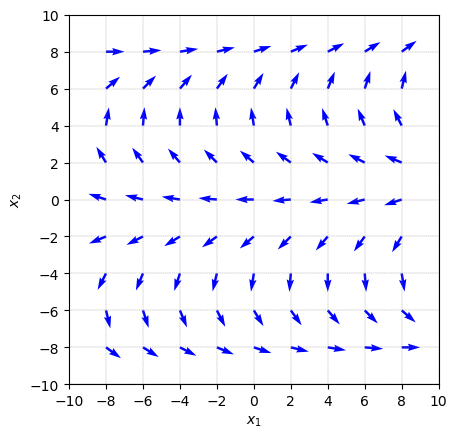

In [7]:
fig, ax = plt.subplots()
ax.quiver(xx1, xx2, uu, vv,  # 绘制蓝色向量场
          angles='xy', scale_units='xy', scale=1, 
          edgecolor='none', facecolor='b')

plt.ylabel('$x_2$')  # 设置 y 轴标签
plt.xlabel('$x_1$')  # 设置 x 轴标签
plt.axis('scaled')  # 保持坐标轴比例
ax.set_xlim([-10, 10])  # 设置 x 轴范围
ax.set_ylim([-10, 10])  # 设置 y 轴范围
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格线
ax.set_xticks(np.linspace(-10, 10, 11))  # 设置 x 轴刻度
ax.set_yticks(np.linspace(-10, 10, 11))  # 设置 y 轴刻度
plt.show()

## 矩阵乘法应用于向量场

In [8]:
V = np.array([uu.flatten(), vv.flatten()]).T  # 将向量展平为二维数组 V

In [9]:
W = V @ A  # 将 V 乘以矩阵 A 得到 W

In [10]:
uu_new = np.reshape(W[:, 0], (-1, 9))  # 变换后的 x 方向分量

In [11]:
vv_new = np.reshape(W[:, 1], (-1, 9))  # 变换后的 y 方向分量

## 绘制变换前后的向量场

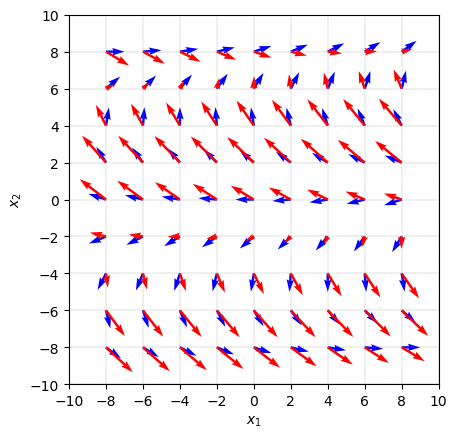

In [12]:
fig, ax = plt.subplots()
ax.quiver(xx1, xx2, uu, vv,  # 绘制原始蓝色向量场
          angles='xy', scale_units='xy', scale=1, 
          edgecolor='none', facecolor='b')
ax.quiver(xx1, xx2, uu_new, vv_new,  # 绘制变换后的红色向量场
          angles='xy', scale_units='xy', scale=1, 
          edgecolor='none', facecolor='r')

plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.axis('scaled')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_xticks(np.linspace(-10, 10, 11))
ax.set_yticks(np.linspace(-10, 10, 11))
plt.show()

## 绘制原点的向量变换

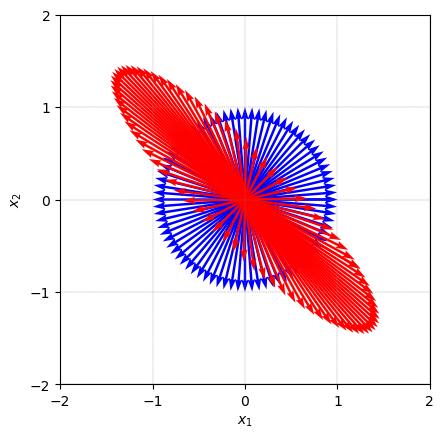

In [13]:
fig, ax = plt.subplots()
ax.quiver(xx1 * 0, xx2 * 0, uu, vv,  # 在原点绘制蓝色原始向量
          angles='xy', scale_units='xy', scale=1, 
          edgecolor='none', facecolor='b')
ax.quiver(xx1 * 0, xx2 * 0, uu_new, vv_new,  # 在原点绘制红色变换后向量
          angles='xy', scale_units='xy', scale=1, 
          edgecolor='none', facecolor='r')

plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.axis('scaled')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
plt.show()